# Practical Numerical Methods with Python
## Homework 2: Traffic flow

Consider the flow of traffic on a one-lane highway. How can we describe the general behavior of this system?

We can define the speed of traffic, $V$, in kilometers per hour. We can also deffine a traffic density, the number of cars per unit length of highwai, $\rho$, in cars per kilometer. Finally, we can define a traffic flux, or the flow rate of cars, $F$ in cars per hour.

Now make a few assumptions about how traffic moves.

If $\rho$ approaches 0, i.e. there are very few cars on the road, then cars will drive as fast as they can at some $V_{max}$.

Conversely, if cars are bumper to bumper along the road, then $\rho$ approaches a $\rho_{max}$ and $V$ approaches 0.

One possible equation to describe this behavior is

\begin{equation}
V=V_{max}\left(1-\frac{\rho}{\rho_{max}}\right)
\end{equation}

If we describe the traffic flux, $F$ as:

\begin{equation}
F=V\rho
\end{equation}

then

\begin{equation}
F=F(\rho)=V(\rho)\rho=V_{max}\rho\left(1-\frac{\rho}{\rho_{max}}\right)
\end{equation}

Unsteady traffic flow can be modelled as the non-linear convection of car density, so we apply the non-linear convection equation with $V$, the wave speed, equal to $\partial F/\partial\rho$:

\begin{equation}
\frac{\partial\rho}{\partial t}+\frac{\partial F}{\partial \rho}\frac{\partial\rho}{\partial x}=0
\end{equation}

Applying the chain rule of calculus, this becomes

\begin{equation}
\frac{\partial\rho}{\partial t}+\frac{\partial F}{\partial x}=0
\end{equation}

where $F$ is defined as above.

Discretize the traffic flow equation using forward difference in time and backward-difference in space. 

Examine a stretch of road $11$ kilometers long using the following conditions:

* $V_{max}=80\frac{km}{hr}$
* $L=11$ km
* $\rho_{max}=250\frac{cars}{km}$
* $nx=51$
* $\Delta t=0.001$ hours

In [1]:
#Import the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [2]:
#The variables to use in the simulation
Vmax=80     #km/hr
L=11        #km
tf=0.17        #Final hours of simulation
rhomax=250  #cars/km
nx=51       #Number of x division
dt=0.001    #hours to second
dx=L/nx     #Finite steps for the space
nt=int((tf)/dt)  #Number of t division

#The total division of the time
t=np.linspace(0,tf,nt)

#Function of speed of traffic
def V(rho,Vmax,rhomax):
    return Vmax*(1-rho/rhomax)

#Function for traffic flux
def F(rho):
    global Vmax,rhomax
    return V(rho,Vmax,rhomax)*rho

def CFL(dt,dx,Vmax):
    return (dt/dx)*Vmax

It's time to check that the CFL is low. I want it $<1$

In [3]:
print('The CFL condition is k={0:.5f}, and k<1'.format(CFL(dt,dx,Vmax)))

The CFL condition is k=0.37091, and k<1


I know that $F=V(\rho)\rho=V_{max}\rho\left(1-\frac{\rho}{\rho_{max}}\right)$ so I have $F(\rho)$. The PDE can be:

\begin{equation}
\frac{\partial\rho}{\partial t}=-\frac{\partial F(\rho)}{\partial x}
\end{equation}

Using backward difference for $x$ and forward difference for $t$, I have

\begin{equation}
\begin{array}{cc}
\large\frac{\partial\rho}{\partial t}\approx\frac{\rho_x^{t+1}-\rho_x^t}{\Delta t} & \large\frac{\partial F(\rho)}{\partial x}\approx\frac{F(\rho_x^t)-F(\rho_{x-1}^t)}{\Delta x}
\end{array}
\end{equation}

Using this in the PDE, I have:

\begin{equation}
\frac{\rho_x^{t+1}-\rho_x^t}{\Delta t}=-\frac{F(\rho_x^t)-F(\rho_{x-1}^t)}{\Delta x}
\end{equation}

Using some algebra, my discretized equation is

\begin{equation}
\rho_x^{t+1}=\rho_x^t-\frac{\Delta t}{\Delta x}\left(F(\rho_x^t)-F(\rho_{x-1}^t)\right)
\end{equation}

$\approx$

In [4]:
def Solution(rho,nx,nt):
    rhoS=np.zeros((nx,nt))
    for i in range(0,nx):
        rhoS[i,0]=rho[i]
    return rhoS

def Finite(Vmax,L,tf,rhomax,nx,nt,dt,dx):
    k=CFL(dt,dx,Vmax) #For simplicity
    rho=IC(nx) #Call the initial condition for the density of cars
    rhoS=Solution(rho,nx,nt)
    Vel=np.zeros(nx)
    for j in range(0,nt-1):
        rhoS=BC(rhoS,nt)
        for i in range(0,nx):
            rhoS[i,j+1]=rhoS[i,j]-(dt/dx)*(F(rhoS[i,j])-F(rhoS[i-1,j]))
    rhoS=BC(rhoS,nt) #Here I check that the BC if fullfiled
    return rhoS

## Simulation Results: Part A

Using the following initial conditions for traffic density:

In [5]:
x= np.linspace(0,L,nx)
#initial conditions, this is rho0
def IC(nx):
    rho0=np.ones(nx)*10
    rho0[10:20]=50
    return rho0

and the following boundary condition:
\begin{equation} \rho(0,t)=10 \end{equation}

Enter the *minimum* velocity at time $t=0$ in meters per second.

In [6]:
def BC(rhoS,nt):
    #This is when km=0, for every time
    for j in range(0,nt):
        rhoS[0,j]=10
    return rhoS
#I call the function for the solution of the PDE
rhoS=Finite(Vmax,L,tf,rhomax,nx,nt,dt,dx)

In [7]:
Vel_ms=V(rhoS,Vmax,rhomax)*(1000/3600) #km/h to m/s

Vel=pd.DataFrame(Vel_ms)
print('The average velocity at time t=0 min is v={0:.02f} m/s'.format(round(Vel.iloc[:,0].min(),2)))

The average velocity at time t=0 min is v=17.78 m/s


Enter the average velocity at time $t=3$ minutes in meters per second.

In [8]:
t_min=t*60

txd=pd.DataFrame({'Time':t_min})
txd=txd.where(txd<3.03).dropna()
txd.where(txd>2.99).dropna()

,Time
50,3.017751


In [9]:
print('The average velocity at time t=3 min is v={0:.02f} m/s'.format(round(Vel.iloc[:,50].mean(),2)))

The average velocity at time t=3 min is v=20.64 m/s


Enter the *minimum* velocity at time $t=6$ minutes in meters per second.

In [10]:
txd=pd.DataFrame({'Time':t_min})
txd=txd.where(txd<6.05).dropna()
txd.where(txd>5.99).dropna()

,Time
100,6.035503


In [11]:
print('The average velocity at time t=6 min is v={0:.02f} m/s'.format(round(Vel.iloc[:,100].min(),2)))

The average velocity at time t=6 min is v=18.80 m/s


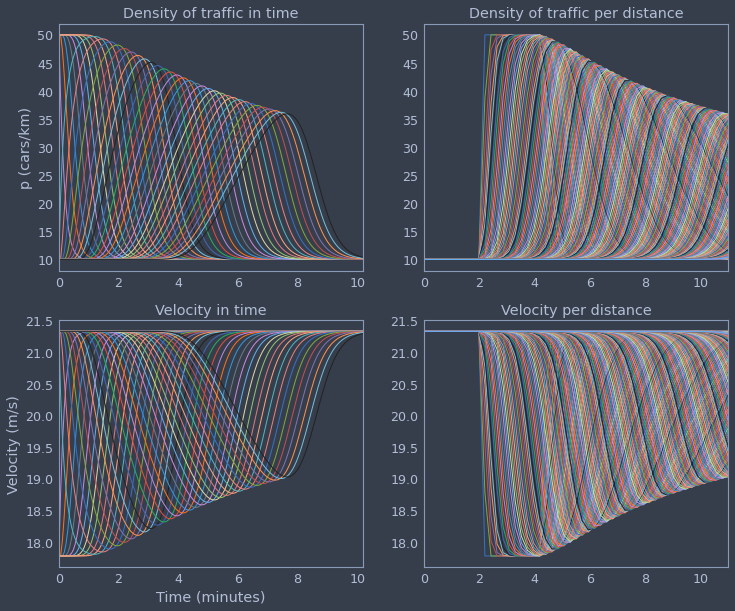

In [12]:
fig, (axs1,axs2)= plt.subplots(2,2,figsize=(12,10))
#First plot
axs1[0].set_title('Density of traffic in time')
axs1[0].plot(t*60,[rhoS[:,j] for j in range(nt)],lw=1)
axs1[0].set_ylabel('p (cars/km)')
#axs[0].set_xlabel('Time (minutes)')
axs1[0].set_xlim(t[0]*60,t[nt-1]*60)
axs1[0].grid(False)
#Second plot
axs2[0].set_title('Velocity in time')
axs2[0].plot(t*60,[Vel_ms[:,j] for j in range(nt)],lw=1)
axs2[0].set_ylabel('Velocity (m/s)')
axs2[0].set_xlabel('Time (minutes)')
axs2[0].set_xlim(t[0]*60,t[nt-1]*60)
axs2[0].grid(False)
#Third plot
axs1[1].set_title('Density of traffic per distance')
axs1[1].plot(x,[rhoS[i,:] for i in range(nx)],lw=1)
#axs1[1].set_ylabel()
axs1[1].set_xlim(x[0],x[nx-1])
axs1[1].grid(False)
#Fourth plot
axs2[1].set_title('Velocity per distance')
axs2[1].plot(x,[Vel_ms[i,:] for i in range(nx)],lw=1)
axs2[1].set_xlim(x[0],x[nx-1])
axs2[1].grid(False)


In [13]:
from matplotlib import animation,rc
rc('animation', html='html5')
#from IPython.display import HTML
#%matplotlib notebook

fig,axs=plt.subplots(2,figsize=(12,10),sharex=True)
line1,=axs[0].plot([],[],lw=2,color='orange')
line2,=axs[1].plot([],[],lw=2,color='r')
axs[0].set_xlim(x[0],x[nx-1])
axs[0].set_ylim(rhoS.min()-2,rhoS.max()+2)
axs[0].set_ylabel('Density (cars/km)')
axs[1].set_xlim(x[0],x[nx-1])
axs[1].set_ylim(Vel_ms.min()-.5,Vel_ms.max()+0.5)
axs[1].set_ylabel('Velocity (m/s)')
plt.xlabel('Distance (km)')


def init():
    line1,=axs[0].plot([],[],lw=2,color='orange')
    line2,=axs[1].plot([],[],lw=2,color='r')
    #axs[0].set_title("Density and Velocity in x={0:.3f}".format(f=x[0]))
    return line1,line2

def animate(i):
    global rhoS,x,t,Vel_ms
    line1.set_data(x,rhoS[:,i])
    line2.set_data(x,Vel_ms[:,i])
    
    axs[0].set_title("Density and Velocity in t={0:.2f} minutes".format(t[i]*60)) 
    return line1,line2

anim = animation.FuncAnimation(fig,animate,init_func=init,
                               frames=nt,interval=50,blit=True)

#HTML(anim.to_html5_video())
plt.close()
anim

In [14]:
fig,axs=plt.subplots(2,figsize=(12,10),sharex=True)
line1,=axs[0].plot([],[],lw=2,color='orange')
line2,=axs[1].plot([],[],lw=2,color='r')
axs[0].set_xlim(t[0]*60,t[nt-1]*60)
axs[0].set_ylim(rhoS.min()-2,rhoS.max()+2)
axs[0].set_ylabel('Density (cars/km)')
axs[1].set_xlim(t[0]*60,t[nt-1]*60)
axs[1].set_ylim(Vel_ms.min()-.5,Vel_ms.max()+0.5)
axs[1].set_ylabel('Velocity (m/s)')
axs[1].set_xlabel('Time (minutes)')


def init():
    line1,=axs[0].plot([],[],lw=2,color='orange')
    line2,=axs[1].plot([],[],lw=2,color='r')
    #axs[0].set_title("Density and Velocity in x={0:.3f}".format(f=x[0]))
    return line1,line2

def animate(i):
    global rhoS,x,t,Vel_ms
    line1.set_data(t*60,rhoS[i,:])
    line2.set_data(t*60,Vel_ms[i,:])
    
    axs[0].set_title("Density and Velocity in x={0:.2f} km".format(x[i])) 
    return line1,line2

anim = animation.FuncAnimation(fig,animate,init_func=init,
                               frames=nx,interval=50,blit=True)

#HTML(anim.to_html5_video())
plt.close()
anim

## Simulation Results: Part B
Now, set $V_{max}=136\frac{km}{hr}$ and repeat the simulation using the following initial conditions for traffic density.

In [15]:
x=np.linspace(0,L,nx)
#rho0=np.ones(nx)*20 #Note this change
#rho0[10:20] = 50
Vmax=136
def IC(nx):
    rho0=np.ones(nx)*20
    rho0[10:20]=50
    return rho0

and the following boundary condition:
\begin{equation} \rho(0,t)=20 \end{equation}

Enter the *minimum* velocity at time $t=0$ in meters per second.

In [16]:
def BC(rhoS,nt):
    #This is when km=0, for every time
    for j in range(0,nt):
        rhoS[0,j]=10
    return rhoS
#I call the function for the solution of the PDE
rhoS=Finite(Vmax,L,tf,rhomax,nx,nt,dt,dx)

In [17]:
Vel_ms=V(rhoS,Vmax,rhomax)*(1000/3600) #km/h to m/s
Vel=pd.DataFrame(Vel_ms)

print('The minimum velocity at time t=0 min is v={0:.02f} m/s'.format(round(Vel.iloc[:,0].min(),2)))

The minimum velocity at time t=0 min is v=30.22 m/s


Enter the average velocity at time $t=3$ minutes in meters per second.

In [18]:
print('The average velocity at time t=3 min is v={0:.02f} m/s'.format(round(Vel.iloc[:,50].mean(),2)))

The average velocity at time t=3 min is v=34.73 m/s


Enter the *minimum* velocity at time $t=3$ minutes in meters per second.

In [19]:
print('The min velocity at time t=3 min is v={0:.02f} m/s'.format(round(Vel.iloc[:,50].min(),2)))

The min velocity at time t=3 min is v=30.98 m/s


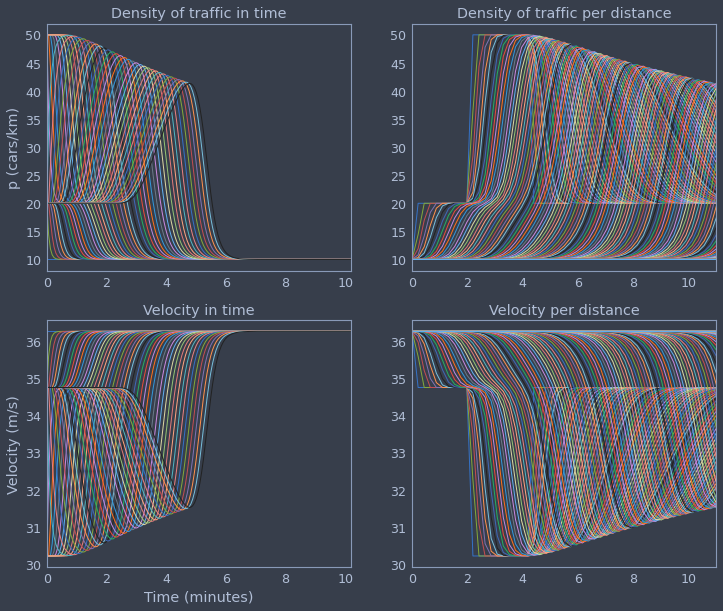

In [20]:
fig, (axs1,axs2)= plt.subplots(2,2,figsize=(12,10))
#First plot
axs1[0].set_title('Density of traffic in time')
axs1[0].plot(t*60,[rhoS[:,j] for j in range(nt)],lw=1)
axs1[0].set_ylabel('p (cars/km)')
#axs[0].set_xlabel('Time (minutes)')
axs1[0].set_xlim(t[0]*60,t[nt-1]*60)
axs1[0].grid(False)
#Second plot
axs2[0].set_title('Velocity in time')
axs2[0].plot(t*60,[Vel_ms[:,j] for j in range(nt)],lw=1)
axs2[0].set_ylabel('Velocity (m/s)')
axs2[0].set_xlabel('Time (minutes)')
axs2[0].set_xlim(t[0]*60,t[nt-1]*60)
axs2[0].grid(False)
#Third plot
axs1[1].set_title('Density of traffic per distance')
axs1[1].plot(x,[rhoS[i,:] for i in range(nx)],lw=1)
#axs1[1].set_ylabel()
axs1[1].set_xlim(x[0],x[nx-1])
axs1[1].grid(False)
#Fourth plot
axs2[1].set_title('Velocity per distance')
axs2[1].plot(x,[Vel_ms[i,:] for i in range(nx)],lw=1)
axs2[1].set_xlim(x[0],x[nx-1])
axs2[1].grid(False)


In [21]:
fig,axs=plt.subplots(2,figsize=(12,10),sharex=True)
line1,=axs[0].plot([],[],lw=2,color='orange')
line2,=axs[1].plot([],[],lw=2,color='r')
axs[0].set_xlim(x[0],x[nx-1])
axs[0].set_ylim(rhoS.min()-2,rhoS.max()+2)
axs[0].set_ylabel('Density (cars/km)')
axs[1].set_xlim(x[0],x[nx-1])
axs[1].set_ylim(Vel_ms.min()-.5,Vel_ms.max()+0.5)
axs[1].set_ylabel('Velocity (m/s)')
plt.xlabel('Distance (km)')


def init():
    line1,=axs[0].plot([],[],lw=2,color='orange')
    line2,=axs[1].plot([],[],lw=2,color='r')
    #axs[0].set_title("Density and Velocity in x={0:.3f}".format(f=x[0]))
    return line1,line2

def animate(i):
    global rhoS,x,t,Vel_ms
    line1.set_data(x,rhoS[:,i])
    line2.set_data(x,Vel_ms[:,i])
    
    axs[0].set_title("Density and Velocity in t={0:.2f} minutes".format(t[i]*60)) 
    return line1,line2

anim = animation.FuncAnimation(fig,animate,init_func=init,
                               frames=nt,interval=50,blit=True)

#HTML(anim.to_html5_video())
plt.close()
anim

In [22]:
fig,axs=plt.subplots(2,figsize=(12,10),sharex=True)
line1,=axs[0].plot([],[],lw=2,color='orange')
line2,=axs[1].plot([],[],lw=2,color='r')
axs[0].set_xlim(t[0]*60,t[100]*60)
axs[0].set_ylim(rhoS.min()-2,rhoS.max()+2)
axs[0].set_ylabel('Density (cars/km)')
axs[1].set_xlim(t[0]*60,t[100]*60)
axs[1].set_ylim(Vel_ms.min()-.5,Vel_ms.max()+0.5)
axs[1].set_ylabel('Velocity (m/s)')
axs[1].set_xlabel('Time (minutes)')


def init():
    line1,=axs[0].plot([],[],lw=2,color='orange')
    line2,=axs[1].plot([],[],lw=2,color='r')
    #axs[0].set_title("Density and Velocity in x={0:.3f}".format(f=x[0]))
    return line1,line2

def animate(i):
    global rhoS,x,t,Vel_ms
    line1.set_data(t*60,rhoS[i,:])
    line2.set_data(t*60,Vel_ms[i,:])
    
    axs[0].set_title("Density and Velocity in x={0:.2f} km".format(x[i])) 
    return line1,line2

anim = animation.FuncAnimation(fig,animate,init_func=init,
                               frames=nx,interval=50,blit=True)

#HTML(anim.to_html5_video())
plt.close()
anim

# End of the code
Made by Ricardo Leal